## Summarising the Law 
In this project, we'll attempt to summarize document that solidify Nigerias validity as a state, the Constitution. Our goal in this project is to implement a machine learning algorithm that takes in sentences of the our corpus (constitution) and outputs a summarsed text.


## Importing Libraries

In [1]:
#Goal: create word vectors
from __future__ import absolute_import, division, print_function
#for word encoding
import codecs
#regex
#import glob
#concurrency
import multiprocessing
import os 
import pprint
import re
import nltk
import gensim
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
#currdir = os.path.dirname(__file__)

## Load Data 

In [2]:
f = open('constitution.txt', 'r')
text = f.read()

## Preprocess and Clean
We preprocess by calling the nltk library which will be used to remove stop words and splitting the text file into sentences as we'll see later in this post

In [3]:
#process and clean data 
nltk.download('punkt') #pretained tokenizer
nltk.download('stopwords') #words like and, or, an, a

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kingsleytorlowei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kingsleytorlowei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
#Split the text file into sentences
raw_sentences = tokenizer.tokenize(text)
print(raw_sentences[1])

(1) This Constitution is supreme and its provisions shall have binding force on the authorities and persons throughout the Federal Republic of Nigeria.


In [6]:
#converting the constitution to a list of words 
def sentence_to_wordList(textFile):
  words = re.sub("[^\w]", " ",  textFile).split()
  return words

In [7]:
#create an instance where for every sentense, each word is tokenized
sentence = []
for raw_sentence in raw_sentences:
  sentence.append(sentence_to_wordList(raw_sentence))

In [8]:
print(raw_sentences[5])
print(sentence[5])

(1) Nigeria is one indivisible and indissoluble sovereign state to be known by the name of the Federal Republic of Nigeria.
['1', 'Nigeria', 'is', 'one', 'indivisible', 'and', 'indissoluble', 'sovereign', 'state', 'to', 'be', 'known', 'by', 'the', 'name', 'of', 'the', 'Federal', 'Republic', 'of', 'Nigeria']


## Visualize
Now let's create a wordcloud to capture the most used words (minus stopwords) in the constitution

In [9]:
import sys
from os import path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# get path to script's directory
#currdir = path.dirname(__file__)
def create_wordcloud(text_file):
    # create numpy araay for wordcloud mask image
    #mask = np.array(Image.open(path.join(currdir, "cloud.png")))
    mask = np.array(Image.open("cloud.png"))
    # create set of stopwords	
    stopwords = set(STOPWORDS)

    # create wordcloud object
    wc = WordCloud(background_color="white",
                    max_words=200, 
                    mask=mask,
                    stopwords=stopwords)
    
    # generate wordcloud
    wc.generate(text)

    # save wordcloud
    wc.to_file("wc.png")


if __name__ == "__main__":

    # generate wordcloud
    create_wordcloud(text)

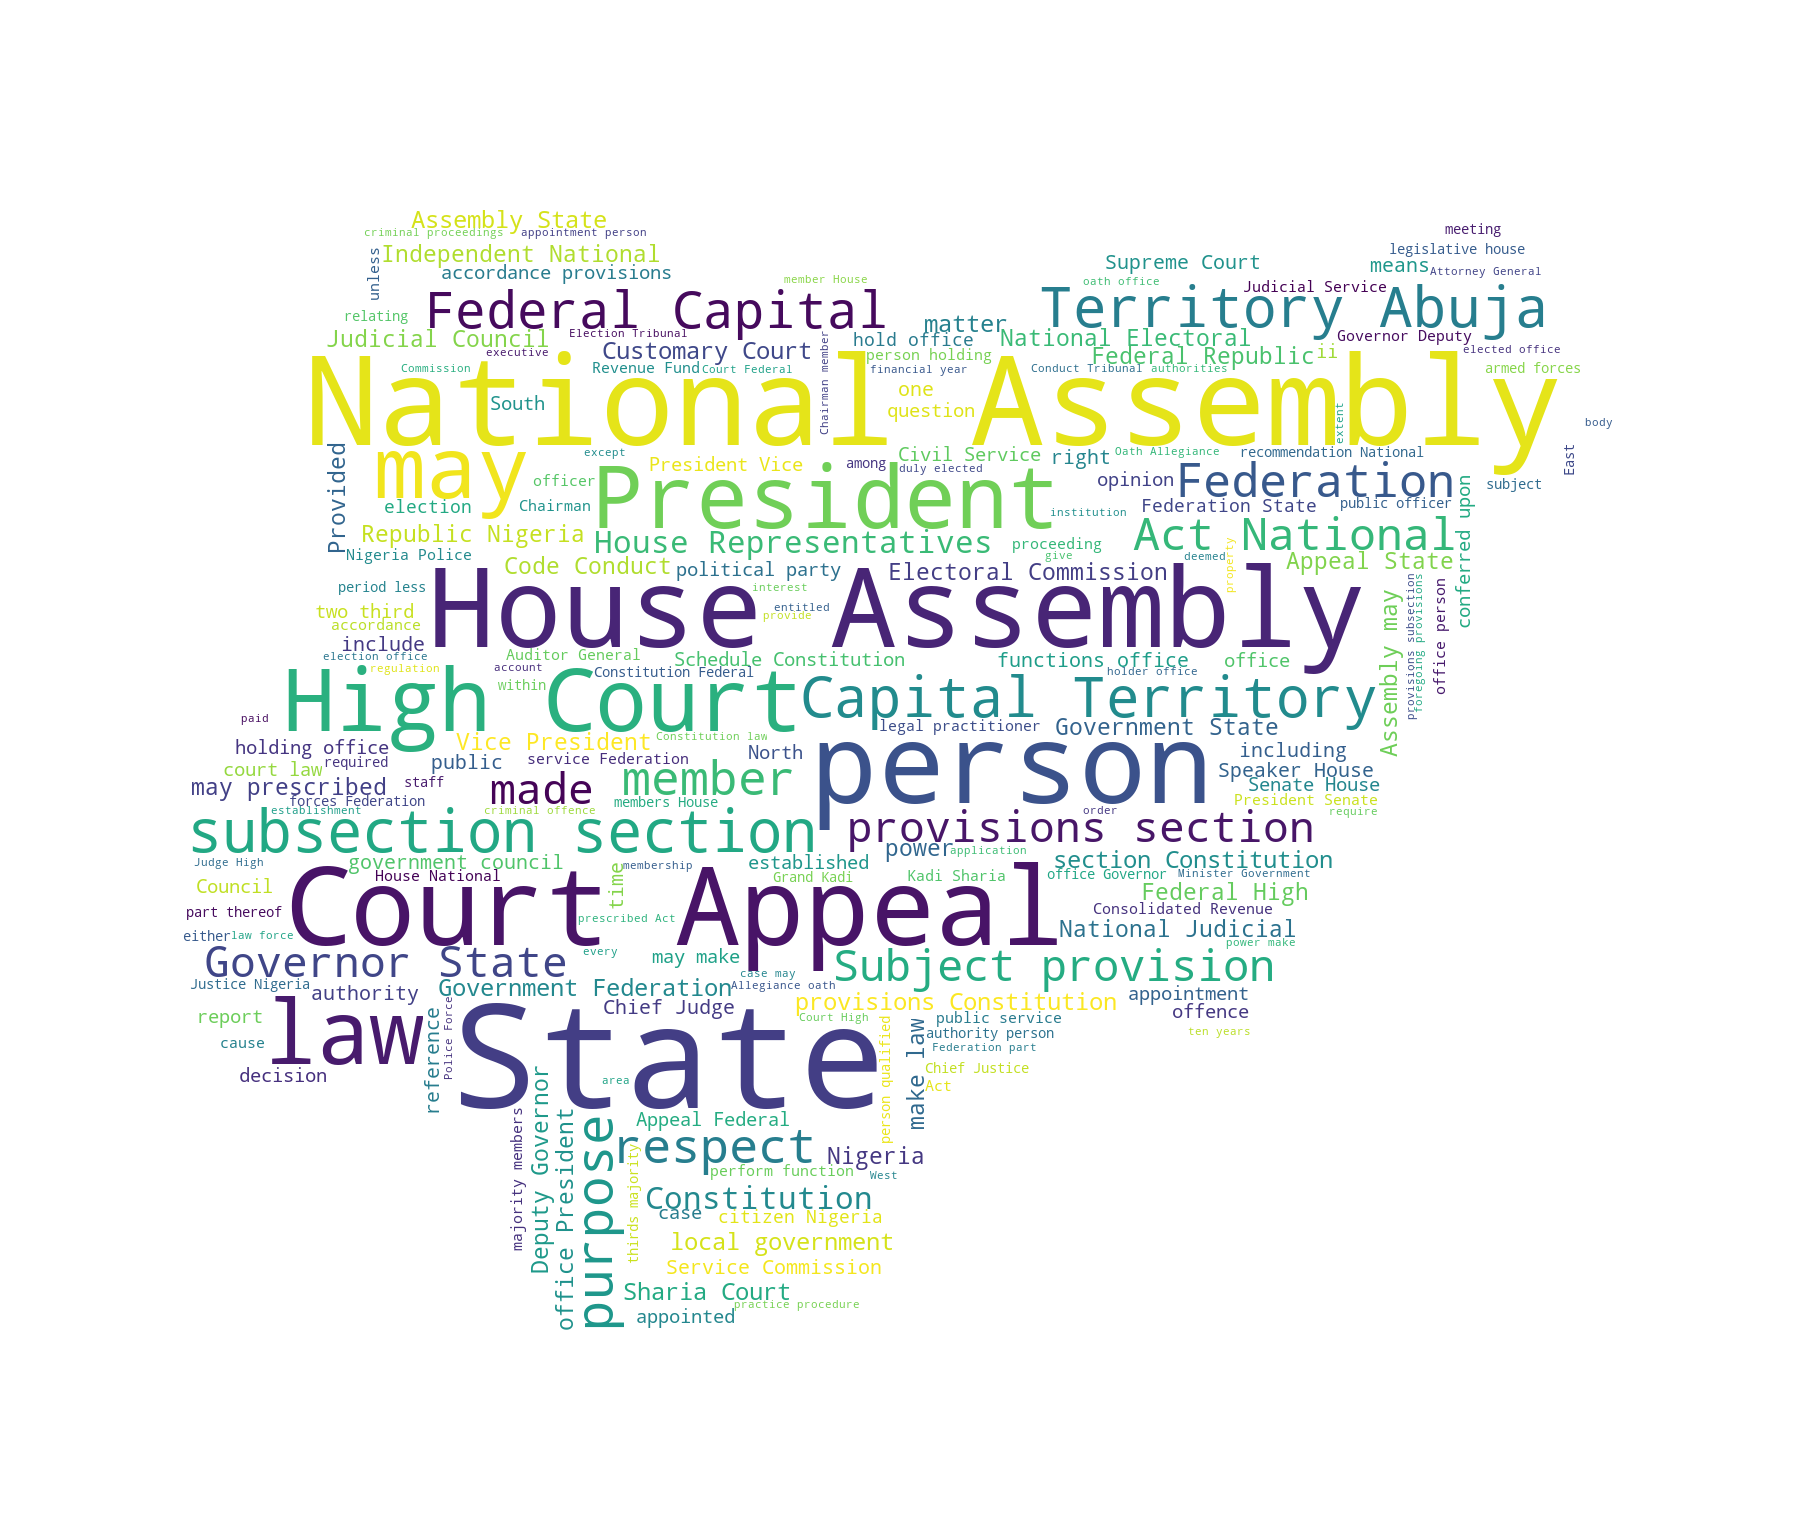

In [10]:
from IPython.display import Image
Image("wc.png")

**Train Word2Vec**

In [11]:
#vectors help with Distance, Similarity and Ranking of Words

#the more features with have, the accurate our model gets but also the more expensive to train 
num_features = 1000
min_word_count = 2

#more workers, the faster we train
num_workers = multiprocessing.cpu_count()
#Size of words to look at, at a time
context_size = 7
#Downsample setting for frequent words
downsampling = 1e-3
#Seed, random number generator, good for debugging
seed = 1

In [12]:
model = gensim.models.Word2Vec(sg=1, seed=seed, workers=num_workers, size=num_features, min_count = min_word_count, window=context_size, sample= downsampling)

In [13]:
model.build_vocab(sentence)
model.train(sentence, total_examples=len(sentence), epochs= 10)

(388842, 642700)

In [14]:
model.most_similar("constitution")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('schedule', 0.9357714653015137),
 ('299', 0.9261624813079834),
 ('generality', 0.9118194580078125),
 ('305', 0.9102289080619812),
 ('V', 0.9087448716163635),
 ('III', 0.908372700214386),
 ('conferring', 0.9062733054161072),
 ('second', 0.904659628868103),
 ('referred', 0.9009990692138672),
 ('defined', 0.9006205201148987)]

In [15]:
model.most_similar('Commander')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ambassador', 0.9778038859367371),
 ('Armed', 0.9762314558029175),
 ('Resident', 0.971220076084137),
 ('Officer', 0.9691475033760071),
 ('headquarters', 0.9677654504776001),
 ('Chairmen', 0.9673479795455933),
 ('Magistrate', 0.9672430753707886),
 ('Forces', 0.9656166434288025),
 ('Each', 0.9585095643997192),
 ('audited', 0.9570441246032715)]